In [106]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

import matplotlib.pyplot as plt


In [107]:
chunksize = 10 ** 4
filepath = "data/2022_place_canvas_history.csv"

ddf = dd.read_csv(filepath, blocksize="400MB")
ddf

,timestamp,user_id,pixel_color,coordinate
npartitions=54,,,,
,object,object,object,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [108]:
part = ddf.partitions[-7]
part["timestamp"] = dd.to_datetime(part["timestamp"])
part.sort_values(by=["timestamp"], ascending=True)
part.compute().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963517 entries, 0 to 2963516
Data columns (total 4 columns):
 #   Column       Dtype              
---  ------       -----              
 0   timestamp    datetime64[ns, UTC]
 1   user_id      object             
 2   pixel_color  object             
 3   coordinate   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 90.4+ MB


In [115]:
timestamp_idx = 1
user_id_idx = 2

threshold = 0.2 # in seconds

count_dict = {}
variance_dict = {}
time_since_dict = {}
last_pixel_time_dict = {}
thing1 = []
thing2 = []

for row in part.itertuples():
    user_id = row[user_id_idx]
    if user_id in last_pixel_time_dict.keys():
        if user_id in time_since_dict.keys():
            time_since_last_pixel = row[timestamp_idx] - last_pixel_time_dict[row[user_id_idx]]
            variance = abs((time_since_dict[user_id] - time_since_last_pixel).total_seconds())
            thing1.append(variance)
            if variance < threshold:
                if user_id not in count_dict.keys():
                    count_dict[user_id] = 0
                count_dict[user_id] += 1
            else:
                time_since_dict[user_id] = time_since_last_pixel
        else:
            time_since_dict[user_id] = row[timestamp_idx] - last_pixel_time_dict[user_id]
    last_pixel_time_dict[user_id] = row[timestamp_idx]


KeyboardInterrupt: 

In [ ]:
timestamp_idx = 1
user_id_idx = 2

threshold = 0.2 # in seconds

count_dict = {}
variance_dict = {}
time_since_dict = {}
last_pixel_time_dict = {}
thing1 = []
thing2 = []

for row in ddf.compute().itertuples():
    user_id = row[user_id_idx]
    if user_id in last_pixel_time_dict.keys():
        if user_id in time_since_dict.keys():
            time_since_last_pixel = row[timestamp_idx] - last_pixel_time_dict[row[user_id_idx]]
            variance = abs((time_since_dict[user_id] - time_since_last_pixel).total_seconds())
            thing1.append(variance)
            if variance < threshold:
                if user_id not in count_dict.keys():
                    count_dict[user_id] = 0
                count_dict[user_id] += 1
            else:
                time_since_dict[user_id] = time_since_last_pixel
        else:
            time_since_dict[user_id] = row[timestamp_idx] - last_pixel_time_dict[user_id]
    last_pixel_time_dict[user_id] = row[timestamp_idx]


KeyboardInterrupt: 

In [ ]:
count_series = pd.Series(count_dict)
count_series.sort_values(ascending=False)

aFo9aUCJWwWUlTk+2FeiSXqy/RDtXhhTzPlFzPoGesL9czzO3QMPhaWwByEAzn/uHY4oFe0A0V/p3AA1bM+lmA==    6
wZG0JZQgRur74NsYOL9jH/6CQMAcv36Wq7cp9JT7FafV/9S/vVWIAvpACzOvTh3K76azPyba4Ukld/J+ZAwLjQ==    2
O5hvOlpPsFEuD8HJw4BcbsM5nnbTXqYB3Lr8PTykoOe7HzVe70JVRuAM0N3CMB3Of8pFgehOBwhi8iOy+BeCnw==    2
tf4j8e1nwFzLmeEk2hF2JzRMlcqA0TTtJ9/0DRLdECSVBIm0YTGZOC0jIFkmXIFAcK0uhOT/ZnzW0IbfVDvlig==    2
+/gsqTgInQZBn8FuDnBeEowgxyVp5C+CjV66MMqA0U5AjcKwpN6fueCqffoeaZjy30nvGECoiPVPRaxRn38ENQ==    2
                                                                                           ..
4KUS30F2Hg5WR1l4L01b2HVPnt+MuJ8bejvCWAZqaYddZTPISKDNOQXWxMhZA2JFNFpB2tQ9wKl5MbQ9IdzlVg==    1
kih/VqqwU0ISzE/h5B+C4txTcndZtvJZiNtO7uMHboIkVp2fbVFQLo/xF/NFibpyqwzmhSdv2H+fw1AcDtGAFw==    1
FhmJX1OX8e/MGi7QRnWUcni32QG9X+aBng7DdgavGWWZuJvtJEDljDwiAK8rqAebCGYx44TjyCOA8Qp2A5tfTA==    1
oE5ZeoejrQhdsWmEcu4Yp2DN/1NfYIZpFVtbcE/nEonitDOIhAWc5CcQUecZJss+elyju6clMUQbjAsT93KEvw==    1
PwryUU/sLkHNbCBRWnW1hKUs/sOzSiuyb0YP3RhFKkHr7TirBRCET1srBkHm

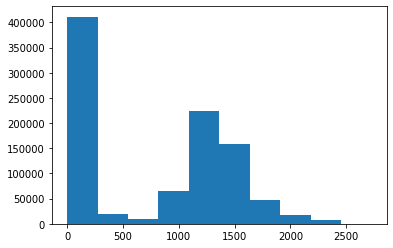

0           0.002
1         305.200
2         301.655
3         309.511
4         308.845
           ...   
961747    767.064
961748     82.404
961749     28.805
961750    129.946
961751    163.694
Length: 961752, dtype: float64

In [ ]:
thing1
things = pd.Series(thing1)
things.sort_values()
plt.hist(things)
plt.show()
things